In [1]:
import scipy.io.wavfile as wav
import scipy.signal as ss
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
np.mean(axis=0)

## Comparing 4 instruments (for loop fixed)

Violoncello: [(1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,)]
Violin: [(1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,)]
Flute: [(1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,)]
Oboe: [(1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,), (1700,)]
Violoncello peaks: [ 200  590  613  694 1182]
Violin peaks: [ 200  543  549  591  892  977 1243 1370]
Flute peaks: [ 200  465  497  530  570  693 1085 1192 1311 1378 1449]
Oboe peaks: [200 549]


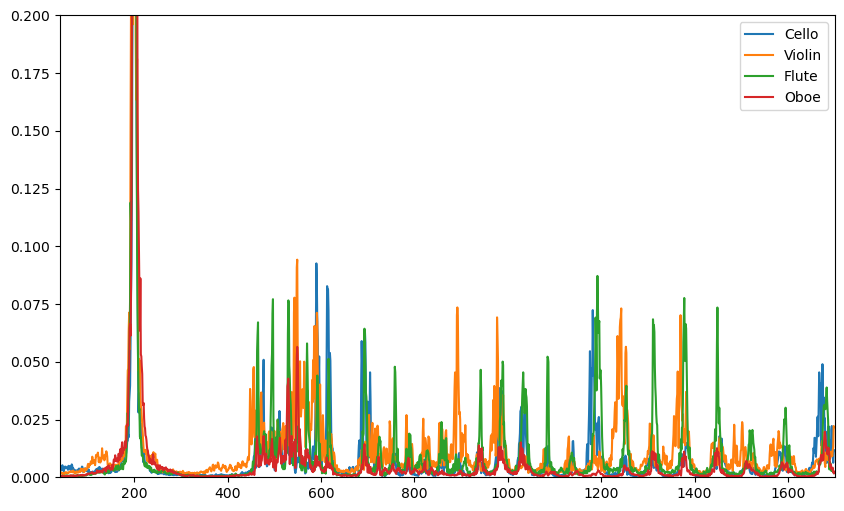

In [14]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

arrays_dict = {
    'Violoncello' : [],
    'Violin' : [],
    'Flute' : [],
    'Oboe' : [],
} # dictionary to store the arrays of the different instruments later


trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('.wav'):
        if allfiles.startswith('1_A'): # there might be something wrong with A? HELPP
            continue  #basically ignores all files starting with 1_A
            
        for instrument in arrays_dict:  # assigns each key in the dictionary "arrays_instru" to the variable "instrument"
            if allfiles.endswith(f'{instrument}.wav'):
                file_path = os.path.join(trimmed_path, allfiles)
                sample_rate, data = wav.read(file_path)
                data = data[:, 0]  # isolate channel 1
                
                # Y-values AMPLITUDE 
                fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
                amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
                # X-values CORRESPONDING FREQUENCIES
                n = len(data)
                frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
            
                # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
            
                central_index = np.argmax(amplitude)
                norm = amplitude[central_index]
                    # print(central_index) CHECKING
            
                spliced_f=frequencies[(central_index-200):(central_index+1500)]
                spliced_a=amplitude[(central_index-200):(central_index+1500)]
                norm_a = spliced_a/norm
            
                arrays_dict[instrument].append(norm_a)
            
            # plt.plot(spliced_a) NOT PLOTTING FIRST

for inst, arrays in arrays_dict.items():
    print(f"{inst}: {[a.shape for a in arrays]}")
# Compute mean of instruments, save them into a dictionary
means = {}
for inst, arrays in arrays_dict.items():  # * see para below for explanation on comma
    means[inst] = np.mean(arrays, axis=0)             # means[inst] --> adding a new key-value pair to "means" dictionary for each instrument. EG, if inst = 'violin': in the dictionary "means", store the result under the key 'violin'.                           
    # * The comma: unpacking the tuple into two variables. Function "items()"" spits out both the key and the corresponding value.
    # 1. inst gets "violin" (the key)
    # 2. arrays gets [array1, array2] (the value) WANT TO KNOW MORE?: Loops (good) 3.3 
    
     
# Find peaks of instruments, save them into a dictionary
peaks= {}
for inst, mean_vals in means.items():
    peaks[inst] = ss.find_peaks(mean_vals, prominence=0.05)[0] # indexing first element using [0], coz ss.findpeaks gives (peaks_array, properties_dict)

# Print peaks
for inst in ['Violoncello', 'Violin', 'Flute', 'Oboe']:
    print(f"{inst} peaks:", peaks[inst])

# Plotting
plt.plot(means['Violoncello'], label='Cello')
plt.plot(means['Violin'], label='Violin')
plt.plot(means['Flute'], label='Flute')
plt.plot(means['Oboe'], label='Oboe')

plt.legend()
plt.xlim(40, 1700)
plt.ylim(0, 0.2)
plt.show()

In [50]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

arrays_instru = {
    'Violoncello' : [],
    'Violin' : [],
    'Flute' : [],
    'Oboe' : [],
} # dictionary to store the arrays of the different instruments later


trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('.wav'):
        if allfiles.startswith('1_A'): # there might be something wrong with A? HELPP
            continue  #basically ignores all files starting with 1_A
            
        for instrument in arrays_instru:  # assigns each key in the dictionary "arrays_instru" to the variable "instrument"
            if filename.endswith(f'{instrument}.wav'):
                file_path = os.path.join(trimmed_path, allfiles)
                sample_rate, data = wav.read(file_path)
                data = data[:, 0]  # isolate channel 1
        
                # Y-values AMPLITUDE 
                fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
                amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
                # X-values CORRESPONDING FREQUENCIES
                n = len(data)
                frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
            
                # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
            
                central_index = np.argmax(amplitude)
                norm = amplitude[central_index]
                    # print(central_index) CHECKING
            
                spliced_f=frequencies[(central_index-200):(central_index+1500)]
                spliced_a=amplitude[(central_index-200):(central_index+1500)]
                norm_a = spliced_a/norm
            
                arrays_instru[instrument].append(norm_a)
            
            # plt.plot(spliced_a) NOT PLOTTING FIRST


# Compute mean of instruments, save them into a dictionary
means = {}
for inst, arrays in arrays_dict.items():  # * see para below for explanation on the comma
    means[inst] = np.mean(arrays, axis=0)             # means[inst] --> adding a new key-value pair to "means" dictionary for each instrument. EG, if inst = 'violin': in the dictionary "means", store the result under the key 'violin'.                           
    
    # * The comma: unpacking the tuple into two variables. Function "items()"" spits out both the key and the corresponding value.
    # 1. inst gets "violin" (the key)
    # 2. arrays gets [array1, array2] (the value) WANT TO KNOW MORE?: Loops (good) 3.3 
    
     
# Find peaks of instruments, save them into a dictionary
peaks= {}
for inst, mean_vals in means.items():
    peaks[inst] = ss.find_peaks(mean_vals, prominence=0.05) [0] # indexing first element using [0], coz ss.findpeaks gives (peaks_array, properties_dict)

# Print peaks
for inst in ['Violoncello', 'Violin', 'Flute', 'Oboe']:
    print(f"{inst} peaks:", peaks[inst])

for inst in ['Violoncello', 'Violin', 'Flute', 'Oboe']:
    peak_indices = peaks[inst]  # x-values (index positions of peaks)
    y_values = means[inst][peak_indices]  # y-values (amplitudes at those peaks)

    plt.scatter(peak_indices, y_values, label=inst)  # SCATTER PLOT!

# Plotting
plt.plot(means['Violoncello'], label='Cello')
plt.plot(means['Violin'], label='Violin')
plt.plot(means['Flute'], label='Flute')
plt.plot(means['Oboe'], label='Oboe')

plt.legend()
plt.xlim(40, 1700)
plt.ylim(0, 0.2)
plt.show()

ValueError: `x` must be a 1-D array

<Figure size 1000x600 with 0 Axes>

## Checking file info ie. sample rate, data.shape, duration

In [2]:
sample_rate, data = wav.read('trimmed_files/1_A-flute.wav')
sample_rate, data #checking data files

(44100,
 array([[ 0.0000000e+00,  0.0000000e+00],
        [-2.5904336e-07, -2.5904336e-07],
        [-9.7212592e-07, -9.7212592e-07],
        ...,
        [-1.1488070e-03, -2.0297655e-04],
        [-8.5483294e-04, -2.9530114e-04],
        [-5.7738624e-04, -4.1617479e-04]], shape=(44100, 2), dtype=float32))

In [3]:
duration_seconds = len(data) / 44100
duration_seconds

1.0

## Checking file info for entire folder

In [4]:
trimmed_path = 'trimmed_files'

x=0 

for files in os.listdir(trimmed_path):
    file_path = os.path.join(trimmed_path, files)
    sample_rate, data = wav.read(file_path)
    if sample_rate == 44100:
        if data.shape == (44100, 2):
            x+=1 #there probably is a better way to just return true/false values
        else: 
            print('error')
    else:
        print('error')

x

60

## LOOP TO TRIM 
__DO NOT RUN AGAIN__

In [5]:
folder_path = 'sound_data'
os.makedirs('./trimmed_files')

for old_files in os.listdir(folder_path):
    if old_files.endswith('.wav'):
        file_path = os.path.join(folder_path, old_files)
        sample_rate, data = wav.read(file_path)
        trimmed_data = data[:44100]  # slice the data array to the first 1 second
        trimmed_filename = f"1_{old_files}"
        trimmed_file_path = os.path.join('./trimmed_files', trimmed_filename)
        wav.write(trimmed_file_path, sample_rate, trimmed_data)

        print(f"Trimmed {old_files} and saved as {trimmed_filename}")

FileExistsError: [Errno 17] File exists: './trimmed_files'

## Plotting FFT signature and peaks

[ 436  441  445  878  881  885  887 1319 1325 1774]
[ 86.426674 158.0015   106.276695 221.1476   125.294304 141.11601
  52.19473   58.285057  33.12173   25.786695]


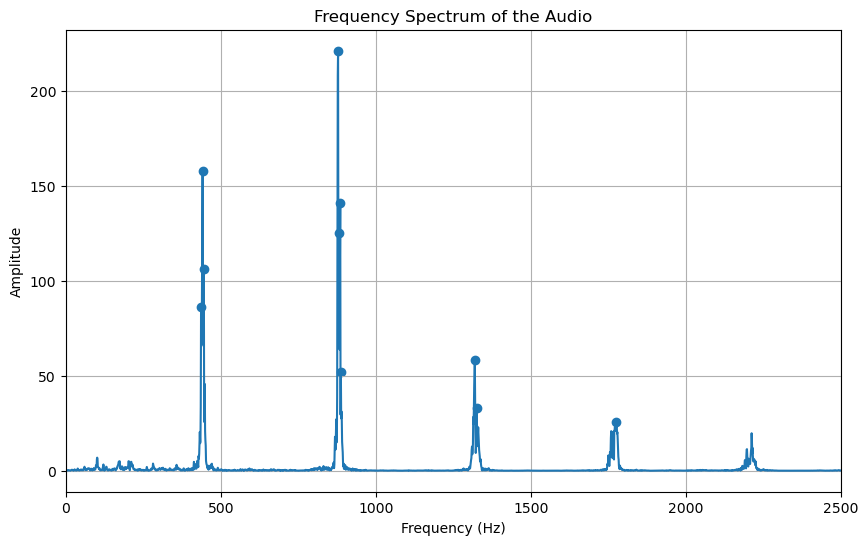

In [5]:
sample_rate, data = wav.read('trimmed_files/1_A-Violoncello.wav')
data = data[:, 0]  # isolate channel 1

# Y-values AMPLITUDE 
fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)


# X-values CORRESPONDING FREQUENCIES
n = len(data)
frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate

# FINDING PEAKS 
        # QN: DOES THIS REALLY HELP TO DETERMINE IF X-AXIS = Hz?
peak_indices, _ = ss.find_peaks(amplitude[:n//2], prominence=20) # find peaks in positive range 

    # CHECKING
print(peak_indices)
print(amplitude[peak_indices])
    # print(list(zip(peak_indices,amplitude[peak_indices])))

plt.figure(figsize=(10, 6))

plt.scatter(frequencies[peak_indices],amplitude[peak_indices]) # plot peaks 
    # CHECKING
    # plt.xlim(250,1800)


# PLOT BEAUTIFIERS
plt.title('Frequency Spectrum of the Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
    # CHECKING    
    # plt.ylim(0,10)
plt.grid(True)

# PLOTTING
plt.plot(frequencies[:n//2], amplitude[:n//2]) # slice to obtain last 22050 elements in the array ie. positive X-values FREQUENCIES
        # CHECKING
        # plt.xlim(438,442)
        # print(frequencies[peak_indices])

plt.xlim(0,2500)

plt.show()

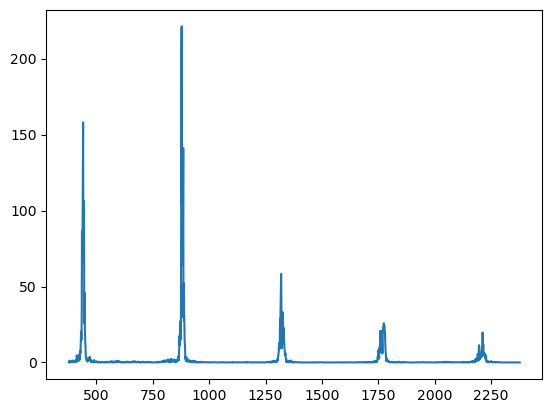

In [6]:
# THRESHOLDING 
        # let's take delta(-) = 100, delta(+) = 1500

central_index = np.argmax(amplitude)

spliced_f=frequencies[(central_index-500):(central_index+1500)]
spliced_a=amplitude[(central_index-500):(central_index+1500)]

plt.plot(spliced_f, spliced_a)

## Now we loop

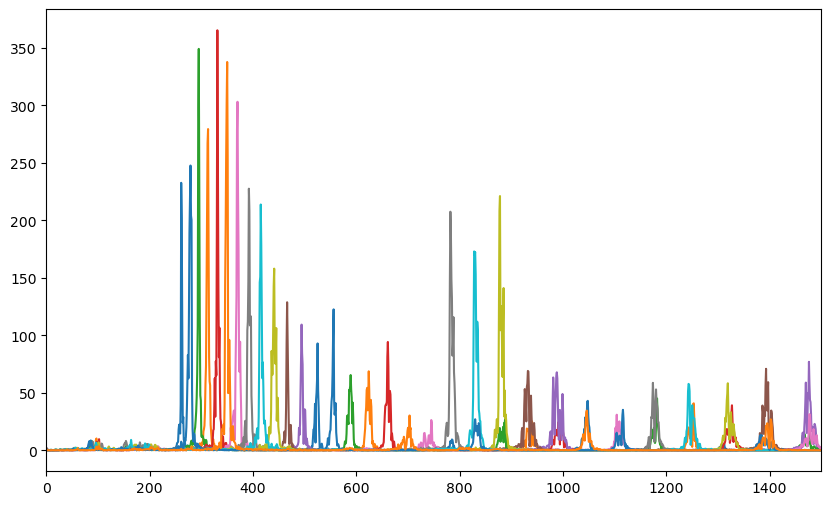

In [8]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
    
        # Y-values AMPLITUDE 
        fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
        amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)

        # X-values CORRESPONDING FREQUENCIES
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate

        # PLOTTING
        plt.plot(frequencies[:n//2], amplitude[:n//2]) # slice to obtain last 22050 elements in the array ie. positive X-values FREQUENCIES
            # CHECKING
            # plt.xlim(438,442)
            # print(frequencies[peak_indices])

plt.xlim(0,1500)

plt.show()

## Normalising 12 cello waves

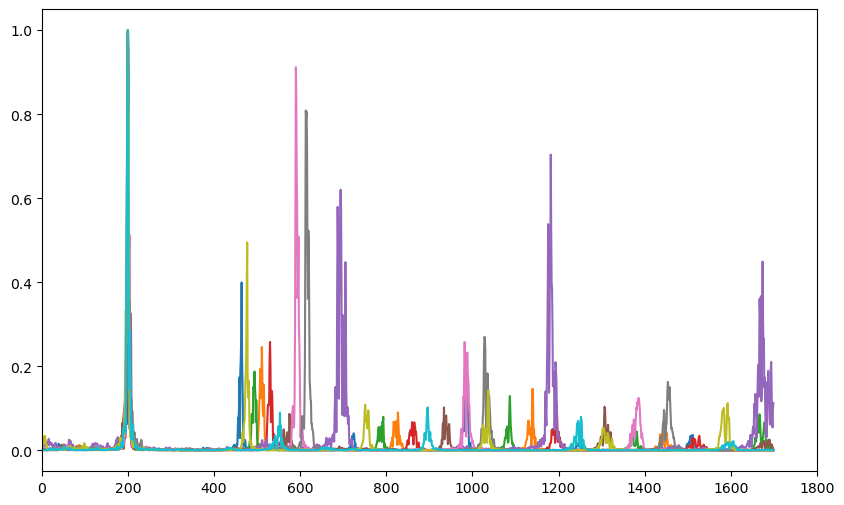

In [8]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Y-values AMPLITUDE 
            fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
            amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
            # X-values CORRESPONDING FREQUENCIES
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
    
            # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                    # print(central_index) CHECKING
                
            spliced_f=frequencies[(central_index-200):(central_index+1500)] # WHY -200 and 1500 range? 
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
               
            # PLOTTING
            plt.plot(norm_a) 
            
                # plt.xlim(438,442)
                # print(frequencies[peak_indices])

plt.xlim(0,1800)

plt.show()

# why is it all still separated and not in one normalised graph?

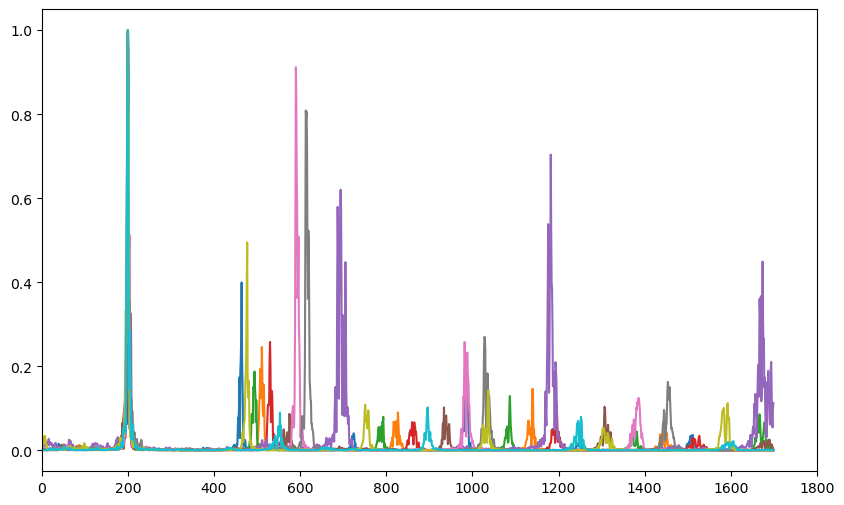

In [10]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Y-values AMPLITUDE 
            fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
            amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
            # X-values CORRESPONDING FREQUENCIES
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
    
            # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                    # print(central_index) CHECKING
                
            spliced_f=frequencies[(central_index-200):(central_index+1500)] # WHY -200 and 1500 range? 
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
               
            # PLOTTING
            plt.plot(norm_a) 
            
                # plt.xlim(438,442)
                # print(frequencies[peak_indices])

plt.xlim(0,1800)

plt.show()

# why is it all still separated and not in one normalised graph?

ValueError: x and y must have same first dimension, but have shapes (44100,) and (1700,)

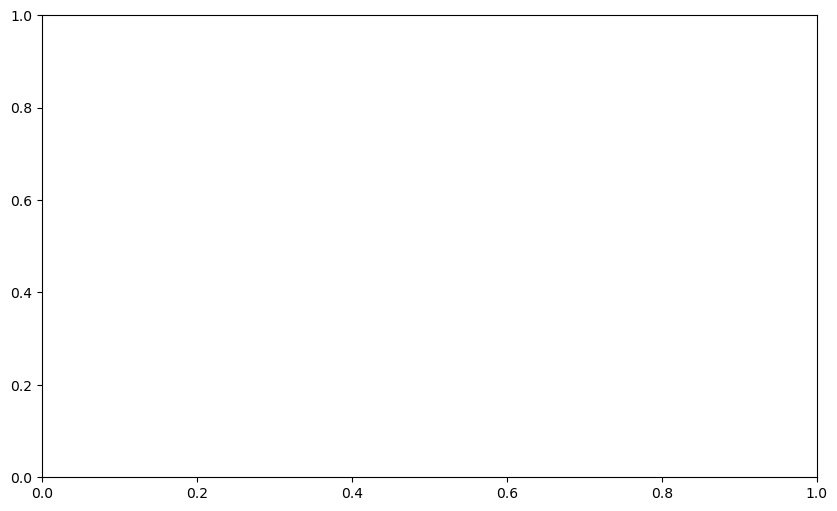

In [9]:
import numpy as np
import os
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

trimmed_path = 'trimmed_files'

# Initialize an empty list to accumulate the normalized amplitude spectra
all_normalized_amplitudes = []

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violin.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            
            all_normalized_amplitudes.append(norm_a)

# Now, calculate the average of all normalized amplitudes for each frequency point
average_normalized_amplitude = np.mean(all_normalized_amplitudes, axis=0)

# Plot the averaged normalized amplitude spectrum
plt.plot(frequencies, average_normalized_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Normalized Amplitude")
plt.title("Averaged Normalized Amplitude Spectrum (Violin)")
plt.xlim(0, 1800)  # Adjust x-axis range as needed
plt.show()

/opt/miniconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: x, y, and format string must not be None

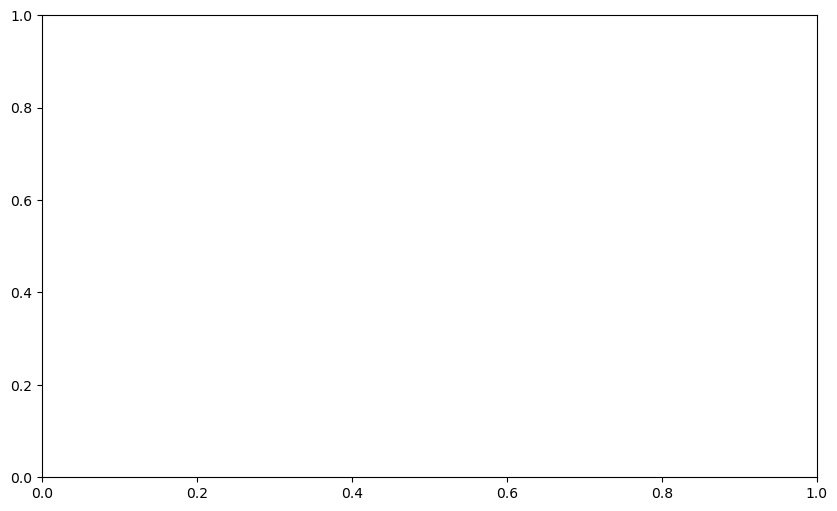

In [11]:
import numpy as np
import os
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

trimmed_path = 'trimmed_files'

# Initialize an empty list to accumulate the normalized amplitude spectra
all_normalized_amplitudes = []
frequencies = None  # To store the frequency values (for consistency across all files)

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Flute.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
# Convert list to a NumPy array for easier manipulation
all_normalized_amplitudes = np.array(all_normalized_amplitudes)

# Now, calculate the average of all normalized amplitudes for each frequency point
average_normalized_amplitude = np.mean(all_normalized_amplitudes, axis=0)

# Plot the averaged normalized amplitude spectrum
plt.plot(frequencies, average_normalized_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Normalized Amplitude")
plt.title("Averaged Normalized Amplitude Spectrum (Flute)")
plt.xlim(0, 1800)  # Adjust x-axis range as needed
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

trimmed_path = 'trimmed_files'

# Initialize an empty list to accumulate the normalized amplitude spectra
all_normalized_amplitudes = []
frequencies = None  # To store the frequency values (for consistency across all files)

for allfiles in os.listdir(trimmed_path):
    if allflies.endswith('.wav'):
        if not allfiles.startswith('1_A'):
            
    if allfiles.endswith('Flute.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
# Convert list to a NumPy array for easier manipulation
all_normalized_amplitudes = np.array(all_normalized_amplitudes)

# Now, calculate the average of all normalized amplitudes for each frequency point
average_normalized_amplitude = np.mean(all_normalized_amplitudes, axis=0)

# Plot the averaged normalized amplitude spectrum
plt.plot(frequencies, average_normalized_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Normalized Amplitude")
plt.title("Averaged Normalized Amplitude Spectrum (Flute)")
plt.xlim(0, 1800)  # Adjust x-axis range as needed
plt.show()

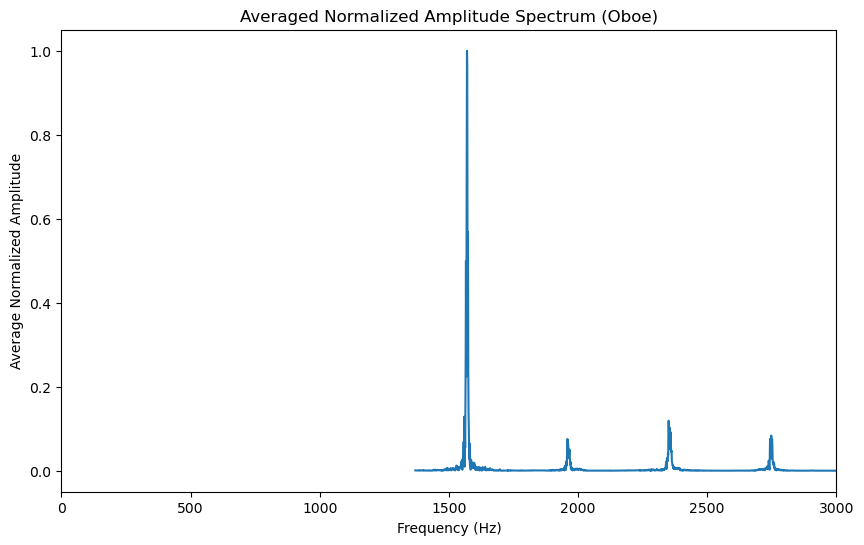

In [12]:
plt.figure(figsize=(10, 6))

trimmed_path = 'trimmed_files'

# Initialize an empty list to accumulate the normalized amplitude spectra
all_normalized_amplitudes = []
frequencies = None  # To store the frequency values (for consistency across all files)

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            # Initialize the frequencies array with the first file's frequencies
            if frequencies is None:
                frequencies = spliced_f  # Save the frequency values from the first file
            
            # Ensure that the frequencies are the same for all files before appending
            if np.array_equal(frequencies, spliced_f):
                all_normalized_amplitudes.append(norm_a)

# Convert list to a NumPy array for easier manipulation
all_normalized_amplitudes = np.array(all_normalized_amplitudes)

# Now, calculate the average of all normalized amplitudes for each frequency point
average_normalized_amplitude = np.mean(all_normalized_amplitudes, axis=0)

# Plot the averaged normalized amplitude spectrum
plt.plot(frequencies, average_normalized_amplitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Normalized Amplitude")
plt.title("Averaged Normalized Amplitude Spectrum (Oboe)")
plt.xlim(0, 3000)  # Adjust x-axis range as needed
plt.show()

## Weird ass average graph i attempted

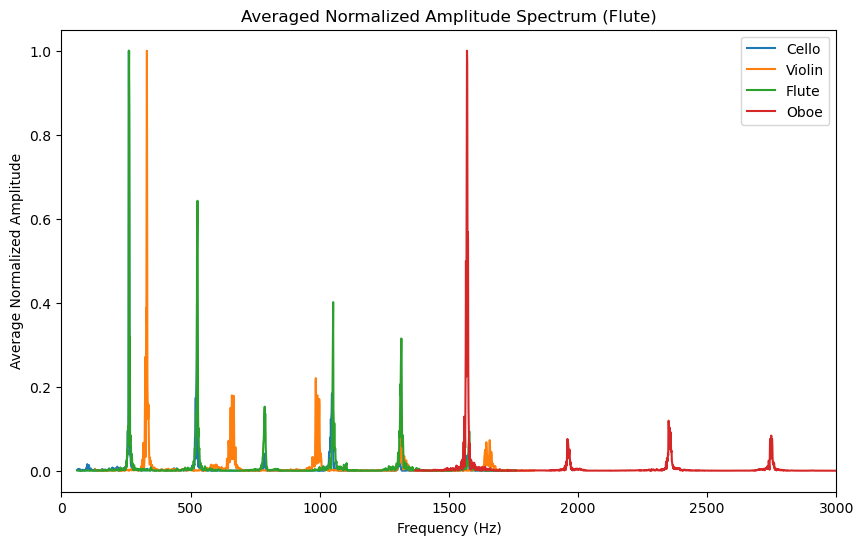

[200 459 464 987]
[ 186  194  200  516  524  529  536  854  860  867 1184 1514 1527]
[ 200  203  465  725  990  995 1254 1517]
[ 187  189  196  200  589  981 1378]


In [15]:
plt.figure(figsize=(10, 6))

trimmed_path = 'trimmed_files'

# Initialize an empty list to accumulate the normalized amplitude spectra
all_normalized_amplitudes_cello = []
all_normalized_amplitudes_violin = []
all_normalized_amplitudes_flute = []
all_normalized_amplitudes_oboe = []

frequencies = None  # To store the frequency values (for consistency across all files)
frequencies_1 = None
frequencies_2 = None
frequencies_3 = None

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            # Initialize the frequencies array with the first file's frequencies
            if frequencies is None:
                frequencies = spliced_f  # Save the frequency values from the first file
            
            # Ensure that the frequencies are the same for all files before appending
            if np.array_equal(frequencies, spliced_f):
                all_normalized_amplitudes_cello.append(norm_a)

                
    if allfiles.endswith('Violin.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            # Initialize the frequencies array with the first file's frequencies
            if frequencies_1 is None:
                frequencies_1 = spliced_f  # Save the frequency values from the first file
            
            # Ensure that the frequencies are the same for all files before appending
            if np.array_equal(frequencies_1, spliced_f):
                all_normalized_amplitudes_violin.append(norm_a)
                
    if allfiles.endswith('Flute.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            # Initialize the frequencies array with the first file's frequencies
            if frequencies_2 is None:
                frequencies_2 = spliced_f  # Save the frequency values from the first file
            
            # Ensure that the frequencies are the same for all files before appending
            if np.array_equal(frequencies_2, spliced_f):
                all_normalized_amplitudes_flute.append(norm_a)   
                
    if allfiles.endswith('Oboe.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Perform FFT
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)  # amplitude spectrum
    
            n = len(data)
            freqs = np.fft.fftfreq(n, 1 / sample_rate)  # frequencies corresponding to FFT
            
            # Normalize the amplitude spectrum
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                
            # Select the frequency range around the peak
            spliced_f = freqs[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            # Initialize the frequencies array with the first file's frequencies
            if frequencies_3 is None:
                frequencies_3 = spliced_f  # Save the frequency values from the first file
            
            # Ensure that the frequencies are the same for all files before appending
            if np.array_equal(frequencies_3, spliced_f):
                all_normalized_amplitudes_oboe.append(norm_a)

  
                

# Convert list to a NumPy array for easier manipulation
all_normalized_amplitudes_cello = np.array(all_normalized_amplitudes_cello)
all_normalized_amplitudes_violin = np.array(all_normalized_amplitudes_violin)
all_normalized_amplitudes_flute = np.array(all_normalized_amplitudes_flute)
all_normalized_amplitudes_oboe = np.array(all_normalized_amplitudes_oboe)



# Now, calculate the average of all normalized amplitudes for each frequency point
average_normalized_amplitude_cello = np.mean(all_normalized_amplitudes_cello, axis=0)
average_normalized_amplitude_violin = np.mean(all_normalized_amplitudes_violin, axis=0)
average_normalized_amplitude_flute = np.mean(all_normalized_amplitudes_flute, axis=0)
average_normalized_amplitude_oboe = np.mean(all_normalized_amplitudes_oboe, axis=0)


plt.plot(frequencies, average_normalized_amplitude_cello, label="Cello")
plt.plot(frequencies_1, average_normalized_amplitude_violin, label="Violin")
plt.plot(frequencies_2, average_normalized_amplitude_flute, label="Flute")
plt.plot(frequencies_3, average_normalized_amplitude_oboe, label="Oboe")

plt.legend()
# Plot the averaged normalized amplitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Normalized Amplitude")
plt.title("Averaged Normalized Amplitude Spectrum (Flute)")

plt.xlim(0, 3000)  

plt.show()


peaks_cello,_ = ss.find_peaks(average_normalized_amplitude_cello, prominence=0.05)
peaks_violin,_ = ss.find_peaks(average_normalized_amplitude_violin, prominence=0.05)
peaks_flute,_ = ss.find_peaks(average_normalized_amplitude_flute, prominence=0.05)
peaks_oboe,_ = ss.find_peaks(average_normalized_amplitude_oboe, prominence=0.05)

print(peaks_cello)
print(peaks_violin)
print(peaks_flute)
print(peaks_oboe)



## Comparing 4 instruments

In [80]:
import os
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as ss
import matplotlib.pyplot as plt

# Setup
plt.figure(figsize=(10, 6))
trimmed_path = 'trimmed_files'

# Dicts for storing results
arrays_dict = {
    'Violoncello': [],
    'Violin': [],
    'Flute': [],
    'Oboe': []
}

# Loop through files
for filename in os.listdir(trimmed_path):
    if filename.startswith('1_A') or not filename.endswith('.wav'):
        continue  # Skip files starting with 1_A or not wavs
    
    for instrument in arrays_dict:
        if filename.endswith(f'{instrument}.wav'):
            file_path = os.path.join(trimmed_path, filename)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # Use channel 1
    
            
            fft_data = np.fft.fft(data)
            amplitude = np.abs(fft_data)
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)
            
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
            
            spliced_f = frequencies[(central_index - 200):(central_index + 1500)]
            spliced_a = amplitude[(central_index - 200):(central_index + 1500)]
            norm_a = spliced_a / norm
            
            arrays_dict[instrument].append(norm_a)


# Compute mean amplitude arrays
means = {inst: np.mean(arrays, axis=0) for inst, arrays in arrays_dict.items()}

# Find peaks
peaks = {inst: ss.find_peaks(mean_vals, prominence=0.05)[0] for inst, mean_vals in means.items()}

# Print peaks
for inst in ['Violoncello', 'Violin', 'Flute', 'Oboe']:
    print(f"{inst} peaks:", peaks[inst])

# Plotting
plt.plot(means['Violoncello'], label='Cello')
plt.plot(means['Violin'], label='Violin')
plt.plot(means['Flute'], label='Flute')
plt.plot(means['Oboe'], label='Oboe')

plt.legend()
plt.xlim(40, 1700)
plt.ylim(0, 0.2)
plt.show()


Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violoncello
Checking file: 1_C.wav for Violin
Checking file: 1_C.wav for Flute
Checking file: 1_C.wav for Oboe
Checking file: 1_C.wav for Violonc

ValueError: `x` must be a 1-D array

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

arrays_cello=[]
arrays_violin=[]
arrays_flute=[]
arrays_oboe=[]

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        if not allfiles.startswith('1_A'): # there might be something wrong with A? HELPP
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Y-values AMPLITUDE 
            fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
            amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
            # X-values CORRESPONDING FREQUENCIES
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
            
            # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
            
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_cello.append(norm_a)
            
            # plt.plot(spliced_a) NOT PLOTTING FIRST

    if allfiles.endswith('Violin.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_violin.append(norm_a)

    if allfiles.endswith('Flute.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_flute.append(norm_a)
            
    if allfiles.endswith('Oboe.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_oboe.append(norm_a)
            
means_cello = np.mean(arrays_cello, axis=0)
means_violin = np.mean(arrays_violin, axis=0)
means_flute = np.mean(arrays_flute, axis=0)
means_oboe = np.mean(arrays_oboe, axis=0)

peaks_cello,_ = ss.find_peaks(means_cello, prominence=0.05)
peaks_violin,_ = ss.find_peaks(means_violin, prominence=0.05)
peaks_flute,_ = ss.find_peaks(means_flute, prominence=0.05)
peaks_oboe,_ = ss.find_peaks(means_oboe, prominence=0.05)

print(peaks_cello)
print(peaks_violin)
print(peaks_flute)
print(peaks_oboe)

plt.plot(means_cello)
plt.plot(means_violin)
plt.plot(means_flute)
plt.plot(means_oboe)

plt.legend('cvfo')

plt.xlim(40,1700)
plt.ylim(0,0.2)
plt.show()

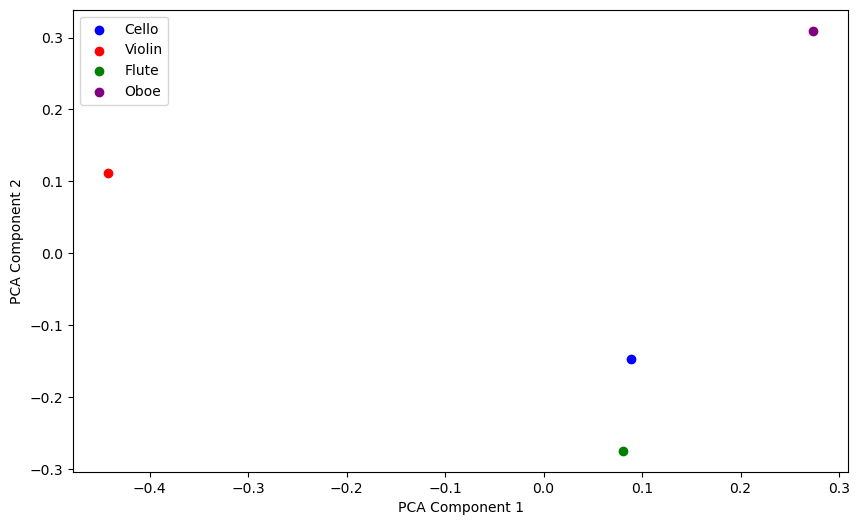

In [40]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

arrays_cello=[]
arrays_violin=[]
arrays_flute=[]
arrays_oboe=[]

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        if not allfiles.startswith('1_A'): # there might be something wrong with A? HELPP
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Y-values AMPLITUDE 
            fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
            amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
            # X-values CORRESPONDING FREQUENCIES
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
            
            # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
            
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_cello.append(norm_a)
            
            # plt.plot(spliced_a) NOT PLOTTING FIRST

    if allfiles.endswith('Violin.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_violin.append(norm_a)

    if allfiles.endswith('Flute.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_flute.append(norm_a)
            
    if allfiles.endswith('Oboe.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_oboe.append(norm_a)
            
means_cello = np.mean(arrays_cello, axis=0)
means_violin = np.mean(arrays_violin, axis=0)
means_flute = np.mean(arrays_flute, axis=0)
means_oboe = np.mean(arrays_oboe, axis=0)

peaks_cello,_ = ss.find_peaks(means_cello, prominence=0.05)
peaks_violin,_ = ss.find_peaks(means_violin, prominence=0.05)
peaks_flute,_ = ss.find_peaks(means_flute, prominence=0.05)
peaks_oboe,_ = ss.find_peaks(means_oboe, prominence=0.05)

from sklearn.decomposition import PCA

X = np.vstack([means_cello, means_violin, means_flute, means_oboe])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[0, 0], X_pca[0, 1], color='blue', label='Cello')
plt.scatter(X_pca[1, 0], X_pca[1, 1], color='red', label='Violin')
plt.scatter(X_pca[2, 0], X_pca[2, 1], color='green', label='Flute')
plt.scatter(X_pca[3, 0], X_pca[3, 1], color='purple', label='Oboe')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [12]:
print(frequencies[:10])
len(frequencies)
print(frequencies[10:])
frequencies>=0
np.all(frequencies[:n//2] > 0)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10. 11. 12. ... -3. -2. -1.]


np.False_

In [ ]:
    # Y-values AMPLITUDE 
    fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
    f"{amplitude}_{allfiles}" = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)

    # X-values CORRESPONDING FREQUENCIES
    n = len(data)
    f"{frequencies}_{allfiles}" = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate


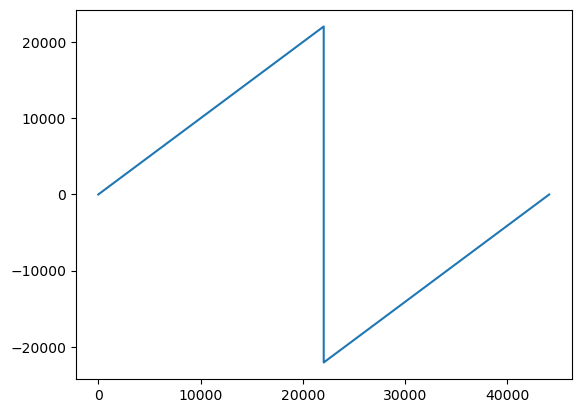

In [17]:
plt.plot(frequencies)

C:\Users\lmr20\miniconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\lmr20\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


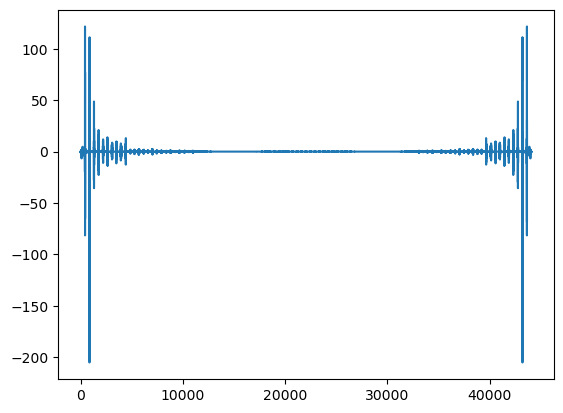

In [18]:
plt.plot(fft_data)

In [33]:
print('identified peaks are', frequencies[peak_indices])
find_peaks(frequencies)

identified peaks are [  441.   878.  1319. -1319.  -878.  -441.]


(array([22049]), {})

AttributeError: module 'numpy' has no attribute 'j'

In [41]:
np.abs(1+1j)

np.float64(1.4142135623730951)

In [42]:
np.sqrt(2)

np.float64(1.4142135623730951)

np.complex128(1j)

In [1]:
print('testing 123')

testing 123
